In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [67]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [68]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [69]:
columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]
df.columns = columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [70]:
df.isna().sum().sum()

0

In [71]:
df.shape

(767, 9)

In [72]:
x = df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y_enc,test_size=0.2,random_state=10)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [76]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred = clf.predict(x_test)

In [78]:
acc = metrics.accuracy_score(y_test,y_pred)
clfr = metrics.classification_report(y_test,y_pred)
confmat = metrics.confusion_matrix(y_test,y_pred)

print(acc)
print(clfr)
print(confmat)

0.7272727272727273
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       107
           1       0.54      0.66      0.60        47

    accuracy                           0.73       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.75      0.73      0.73       154

[[81 26]
 [16 31]]


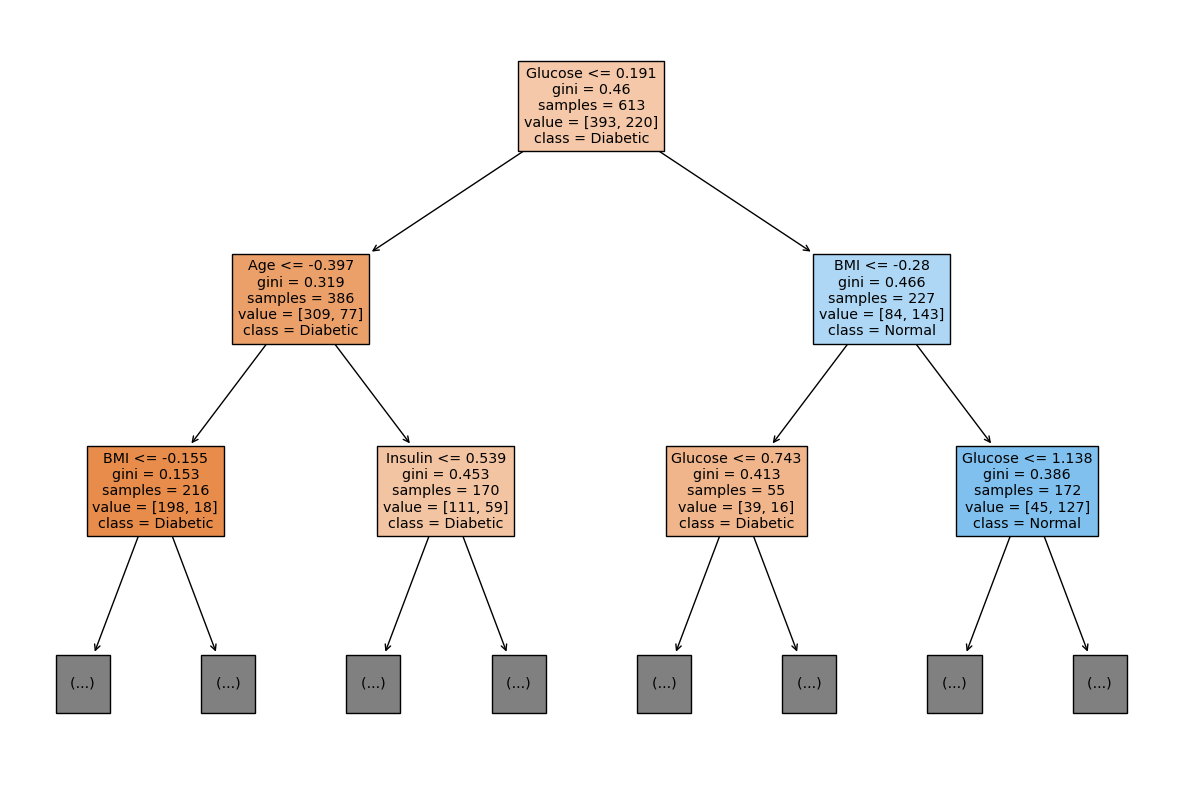

In [82]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['Diabetic', 'Normal'],max_depth=2)
plt.show()